<a id="t1."></a>
# 1. Import Data & Python Packages

In [24]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [25]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("test.csv")

# preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# preview test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<a id="t2."></a>
# 2. Bewertung von Datenqualität und fehlenden Werten

In [26]:
# fehlende Werte in den train data prüfen
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<a id="t2.1."></a>
## 2.1.    Age - Missing Values

In [5]:
# percent of missing "Age" 
print('Prozent von fehlende Werte von "Age" ist %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Prozent von fehlende Werte von "Age" ist 19.87%


In [6]:
# mean age
print('Mittelwert von "Age" ist %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('Median von "Age" ist %.2f' %(train_df["Age"].median(skipna=True)))

Mittelwert von "Age" ist 29.70
Median von "Age" ist 28.00


<a id="t2.2."></a>
## 2.2. Cabin - Missing Values

In [7]:
# percent of missing "Cabin" 
print('Prozent von fehlende Werte von "Cabin" ist %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Prozent von fehlende Werte von "Cabin" ist 77.10%


<a id="t2.3."></a>
## 2.3. Embarked - Missing Values

In [8]:
# percent of missing "Embarked" 
print('Prozent von fehlende Werte von "Embarked" ist %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Prozent von fehlende Werte von "Embarked" ist 0.22%


In [9]:
print('Der häufigste Hafen für die Einschiffung ist %s.' %train_df['Embarked'].value_counts().idxmax())

Der häufigste Hafen für die Einschiffung ist S.


<a id="t2.4."></a>
## 2.4. Endgültige Anpassungen der Daten (Train & Test)

Auf der Grundlage meiner Einschätzung der fehlenden Werte im Datensatz werde ich die folgenden Änderungen an den Daten vornehmen:
* Fehlt in einer Zeile der Wert "Age", so wird mit 28 (Medianalter) imputiert.
* Fehlt in einer Zeile die Angabe "Embarked", wird mit "S" (dem häufigsten Einschiffungshafen) imputiert.
* Ich ignoriere "Cabin" als Variable. Es gibt zu viele fehlende Werte für eine Imputation. Aus den verfügbaren Informationen geht hervor, dass dieser Wert mit der Klasse des Passagiers und dem gezahlten Fahrpreis zusammenhängt.


In [27]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [28]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# preview adjusted train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<a id="t2.4.1."></a>
## 2.4.1. Zusätzliche Variablen

In [29]:
## Kategorische Variable für Alleinreisende erstellen
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [30]:
#kategorische Variablen erstellen und einige Variablen löschen
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


### Wenden Sie nun die gleichen Änderungen auf die Testdaten an. 


In [15]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<a id="t4."></a>
# 4. Logistische Regression und Ergebnisse

<a id="t4.1."></a>
## 4.1. Auswahl der Merkmale

<a id="t4.1.1."></a>
### 4.1.1. Rekursive Merkmalseliminierung

Bei einem externen Schätzer, der den Merkmalen Gewichtungen zuweist, besteht die rekursive Merkmalseliminierung (RFE) darin, Merkmale auszuwählen, indem rekursiv immer kleinere Sätze von Merkmalen berücksichtigt werden. Zunächst wird der Schätzer auf der anfänglichen Merkmalsmenge trainiert, und die Wichtigkeit jedes Merkmals wird entweder durch ein "coef_"-Attribut oder durch ein "feature_importances"-Attribut ermittelt. Dann werden die am wenigsten wichtigen Merkmale aus der aktuellen Merkmalsmenge herausgefiltert. Dieses Verfahren wird rekursiv mit der herausgefilterten Menge wiederholt, bis die gewünschte Anzahl der auszuwählenden Merkmale erreicht ist.

References: <br>
http://scikit-learn.org/stable/modules/feature_selection.html <br>

<a id="t4.1.2."></a>
### 4.1.2. Feature-Ranking mit rekursiver Feature-Elimination und Kreuzvalidierung

RFECV führt RFE in einer Kreuzvalidierungsschleife durch, um die optimale Anzahl oder die beste Anzahl von Merkmalen zu finden. Nachfolgend wird eine rekursive Merkmalseliminierung auf die logistische Regression angewandt, wobei die Anzahl der durch Kreuzvalidierung ausgewählten Merkmale automatisch abgestimmt wird.

Optimal number of features: 8
Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male']


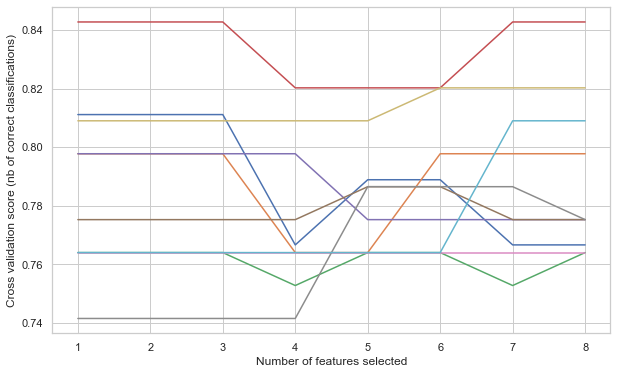

In [31]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

As we see, eight variables were kept. 

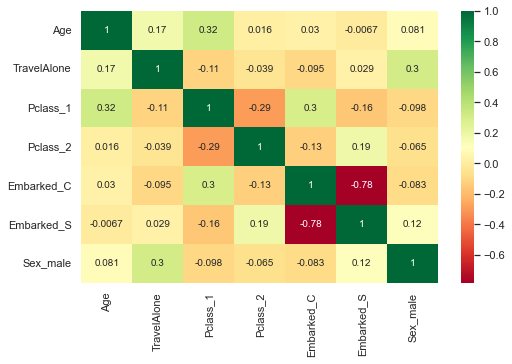

In [19]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

<a id="t4.2.1."></a>
### Modellbewertung auf der Grundlage einer einfachen train/test-Aufteilung mit `train_test_split()` Funktion

Train/Test split results:
LogisticRegression accuracy is 0.777
LogisticRegression log_loss is 0.506
LogisticRegression auc is 0.836


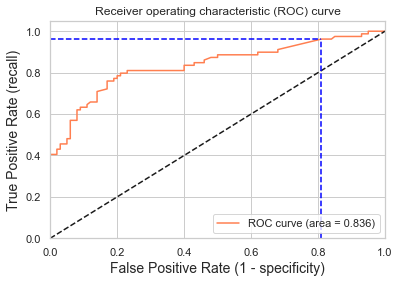

Using a threshold of 0.073 guarantees a sensitivity of 0.962 and a specificity of 0.190, i.e. a false positive rate of 81.00%.


In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))